# 支持向量机SVM
- 也叫最大边缘分类器

- `datasets.make_classification()`
    - 生成一个随机的n类分类问题
- `datasets.make_regression()`
    - 生成一个随机的回归问题
- `datasets.make_blobs()`
    - 生成可以用于聚类的高斯分布数据

In [61]:
from sklearn import datasets

x,y = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    random_state=7816
)

In [2]:
x.shape, y.shape

((100, 2), (100,))

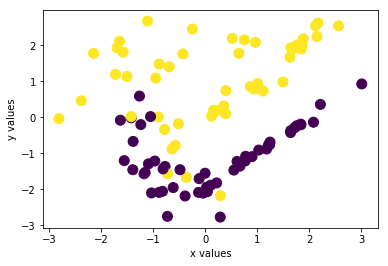

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x[:,0],x[:,1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [62]:
from sklearn import model_selection
import numpy as np
x = x.astype(np.float32)  # 如果用opencv，需要注意转换格式
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

## opencv 构建支持向量机

In [6]:
import cv2
svm_cv2 = cv2.ml.SVM_create()

In [8]:
# 尝试使用一条直线来分割数据的svm
# 使用setKernel来指定
svm_cv2.setKernel(cv2.ml.SVM_LINEAR)

In [12]:
svm_cv2.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [14]:
_, y_pred = svm_cv2.predict(x_test)

In [15]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8

## 决策边界可视化

print(xx.shape,yy.shape,x_hypo.shape, zz.shape) #(34, 29) (34, 29) (986, 2) (34, 29)

In [63]:
def plot_decision_boundary(svm, x_test, y_test):
    x_min, x_max = x_test[:,0].min() - 1, x_test[:,0].max() + 1
    y_min, y_max = x_test[:,1].min() - 1, x_test[:,1].max() + 1
    
    h = 0.2  # step size in mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 将（xx， yy）堆叠为一个N×2的矩阵
    # 让函数在opencv和sklearn下都能工作，需要转换为float32
    x_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
#     x_hypo = np.column_stack((xx.ravel().astype(np.float32), 
#                              yy.ravel().astype(np.float32)))
    
    # 目标标签zz，用来创建一个特征结构的颜色映射
    _, zz = svm.predict(x_hypo)
    
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=200)

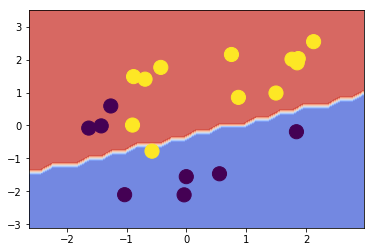

In [51]:
plot_decision_boundary(svm_cv2, x_test, y_test)

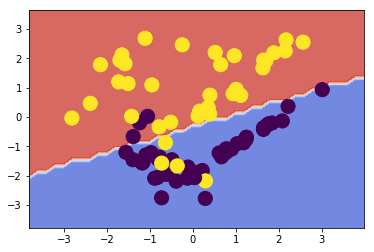

In [52]:
plot_decision_boundary(svm_cv2, x_train, y_train)

## sklearn构建支持向量机

In [ ]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object
model = svm.svc() # there is various option associated with it, this is simple for classification. You can refer link, for mo# re detail.
# Train the model using the training sets and check score
model.fit(X, y)
model.score(X, y)
#Predict Output
predicted= model.predict(x_test)

In [54]:
from sklearn import svm

In [58]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
model = svm.SVC()  # 大写

model.fit(x_train, y_train)
model.score(x_test, y_test)

/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8

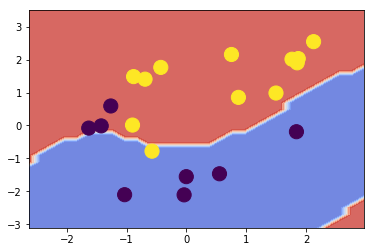

In [60]:
# 复制前面的边界可视化函数，
# 注意： 修改predict语句

x_min, x_max = x_test[:,0].min() - 1, x_test[:,0].max() + 1
y_min, y_max = x_test[:,1].min() - 1, x_test[:,1].max() + 1

h = 0.2  # step size in mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 将（xx， yy）堆叠为一个N×2的矩阵
# 让函数在opencv和sklearn下都能工作，需要转换为float32
x_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
#     x_hypo = np.column_stack((xx.ravel().astype(np.float32), 
#                              yy.ravel().astype(np.float32)))

# 目标标签zz，用来创建一个特征结构的颜色映射
zz = model.predict(x_hypo)

zz = zz.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=200)

# 6.2非线性支持向量机、核机制

## 核
- cv2.ml.SVM_LINEAR
- cv2.ml.SVM_POLY
- cv2.ml.SVM_RBF
- cv2.ml.SVM_SIGMOID
- cv2.ml.SVM_INTER
- ...

In [72]:
kernels = [cv2.ml.SVM_LINEAR, cv2.ml.SVM_POLY, cv2.ml.SVM_RBF, cv2.ml.SVM_SIGMOID]

In [73]:
import cv2

error: OpenCV(4.1.0) /io/opencv/modules/ml/src/svm.cpp:1319: error: (-211:One of arguments' values is out of range) The kernel parameter <degree> must be positive in function 'checkParams'


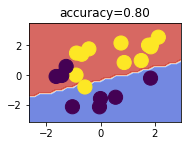

In [74]:
for i, kernel in enumerate(kernels):
    svm_cv2 = cv2.ml.SVM_create()
    svm_cv2.setKernel(kernel)
    svm_cv2.train(x_train, cv2.ml.ROW_SAMPLE, y_train)
    
    _, y_pred = svm_cv2.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    plt.subplot(2,2, i+1)
    plot_decision_boundary(svm_cv2, x_test, y_test)
    plt.title('accuracy=%.2f'%accuracy)